In [1]:
# The United States Environmental Protection Agency through its Office of
# Research and Development has developed this software. The code is made
# publicly available to better communicate the research. All input data
# used fora given application should be reviewed by the researcher so
# that the model results are based on appropriate data for any given
# application. This model is under continued development. The model and
# data included herein do not represent and should not be construed to
# represent any Agency determination or policy.
#
# This file was written by Dr. Namdi Brandon
# ORCID: 0000-0001-7050-1538
# March 22, 2018

This code is **only used for development**

This notebook visualizes the distributions of coefficient of variation

import

In [6]:
import sys
sys.path.append('..//run_chad')
sys.path.append('..//processing')
sys.path.append('..//source')

# plotting capability
import matplotlib.pylab as plt

# math capability
import numpy as np

# dataframe capabiltiy
import pandas as pd

# ABMHAP capabilities
import my_globals as mg
import chad_demography as cd
import chad_demography_adult_non_work as cdanw
import chad_demography_adult_work as cdaw
import chad_demography_child_school as cdcs
import chad_demography_child_young as cdcy
import demography as dmg

import activity, chad

%matplotlib notebook

constants

In [7]:
chooser = { dmg.ADULT_WORK: (cdaw.CHAD_demography_adult_work(), chad.FDIR_ADULT_WORK_LARGE), 
          dmg.ADULT_NON_WORK: (cdanw.CHAD_demography_adult_non_work(), chad.FDIR_ADULT_NON_WORK_LARGE), 
          dmg.CHILD_SCHOOL: (cdcs.CHAD_demography_child_school(), chad.FDIR_CHILD_SCHOOL_LARGE),
          dmg.CHILD_YOUNG: (cdcy.CHAD_demography_child_young(), chad.FDIR_CHILD_YOUNG_LARGE), }

functions

In [8]:
def get_fname(the_demographic, act):

    x, fpath = chooser[the_demographic]
    fname = x.fname_stats[act][cd.DT]
    fname = fpath + '\\' + fname
    fname = fname.replace('/', '\\')
    
    return fname

def plot_hist(cv, ax, label, color):
    
    y = cv[ np.isfinite(cv) ]
    
    ax.hist(y, label=label, color=color, bins=40)
    ax.legend(loc='best')
    return ax

def plot_cdf(cv, ax, label, color):
    
    y = cv[ np.isfinite(cv) ]
    
    x, y = mg.get_ecdf(y)
    
    ax.plot(x, y, label=label, color=color, lw=2)
    ax.legend(loc='best')
    return ax

run

In [9]:
x_temp, temp = chooser[dmg.ADULT_NON_WORK]

#keys = x_temp.keys
keys = [mg.KEY_SLEEP,]

demos = [dmg.ADULT_WORK, dmg.ADULT_NON_WORK, dmg.CHILD_SCHOOL, dmg.CHILD_YOUNG]

labels = ['working adult', 'non-working adult', 'child school', 'child young']

colors_demo = {dmg.ADULT_WORK: 'blue', dmg.ADULT_NON_WORK: 'red', dmg.CHILD_SCHOOL: 'brown', 
              dmg.CHILD_YOUNG: 'green'}

colors_activity = {mg.KEY_SLEEP: 'blue', mg.KEY_EAT_BREAKFAST: 'red', mg.KEY_EAT_LUNCH: 'green', 
                   mg.KEY_EAT_DINNER: 'brown', mg.KEY_COMMUTE_TO_WORK: 'gray', mg.KEY_COMMUTE_FROM_WORK: 'purple', 
                  mg.KEY_WORK: 'orange'}

plot

In [10]:
#
# plot Coefficient of Variation: create a plot for each activity
#

for k in keys:        
    
    fig, axes = plt.subplots( 4, sharex=True)    
    
    # set the title
    fig.suptitle(activity.INT_2_STR[k])
    
    z = zip(demos, labels)
    for idx, x in enumerate(z):
        
        d, label = x
        
        # axis
        ax = axes[idx]
        
        # get data
        fname = get_fname(d, k)    
        df = pd.read_csv(fname)    
        
        # plot
        ax = plot_hist(df.cv.values, ax, label, colors_demo[d])
        
plt.show()

<IPython.core.display.Javascript object>

FileNotFoundError: File b'..\\data_large\\demography\\adult_work\\longitude\\sleep\\all\\stats_dt.csv' does not exist

<IPython.core.display.Javascript object>


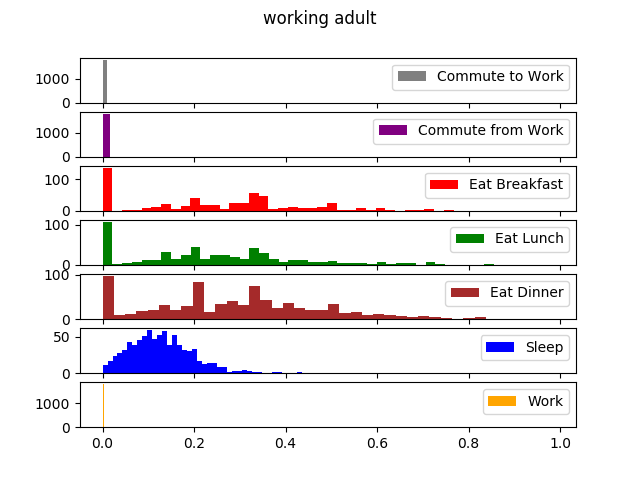

<IPython.core.display.Javascript object>


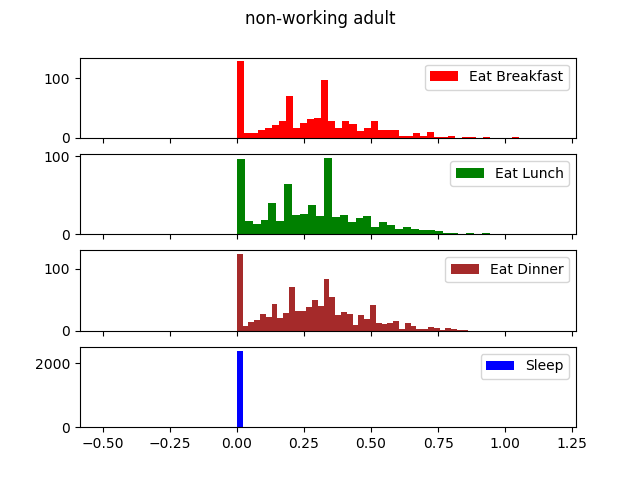

<IPython.core.display.Javascript object>


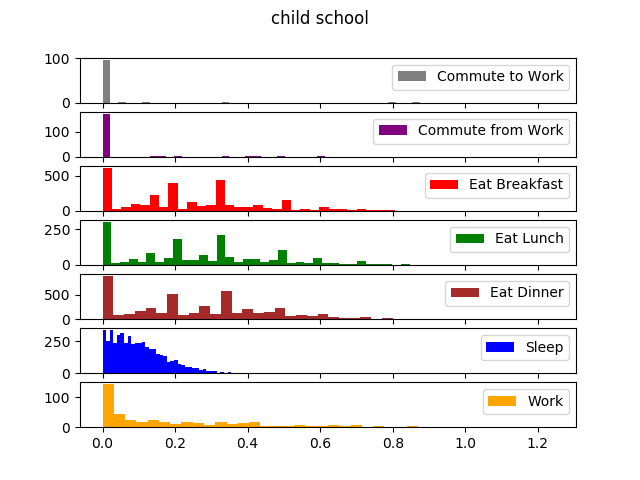

<IPython.core.display.Javascript object>


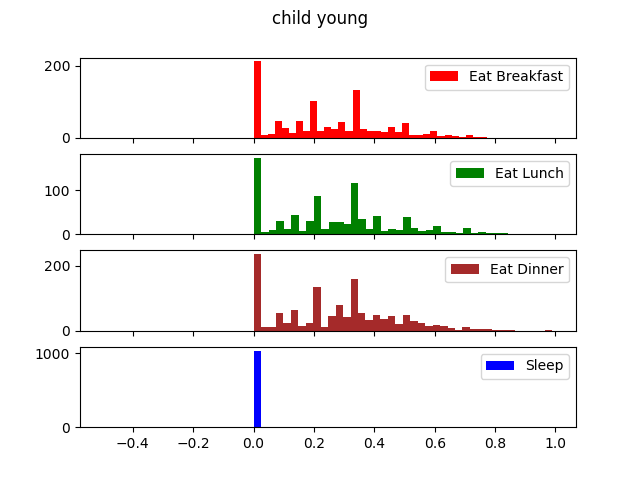

In [6]:
#
# plot Coefficient of Variation: create a plot for each demographic
#


for d, title in zip(demos, labels):        
    
    x_temp, temp = chooser[d]
    keys = x_temp.keys
    
    fig, axes = plt.subplots( len(keys), sharex=True)    
    
    # set the title
    fig.suptitle( title )
        
    for idx, k in enumerate(keys):
        
        #d, label, color = x
        
        # axis
        ax = axes[idx]
        
        # get data
        fname = get_fname(d, k)    
        df = pd.read_csv(fname)    
        
        # plot
        ax = plot_hist(df.cv.values, ax, activity.INT_2_STR[k], colors_activity[k])                
        
plt.show()

<IPython.core.display.Javascript object>


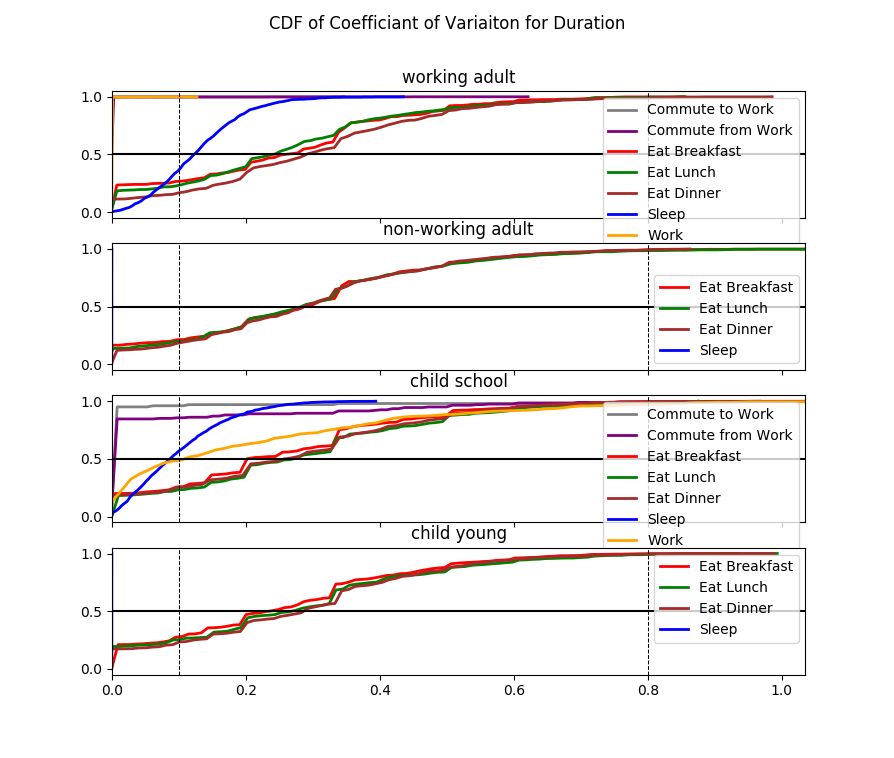

In [21]:
#
# plot Coefficient of Variation: create a CDF plot for each demographic
#

fig, axes = plt.subplots( 4, sharex=True)    

fig.suptitle( 'CDF of Coefficiant of Variaiton for Duration' )

COLOR = 'k'
LW = 0.75
LS = '--'
CV_MIN, CV_MAX = 0.10, 0.80

for ax, d, title in zip(axes, demos, labels):        
    
    x_temp, temp = chooser[d]
    keys = x_temp.keys
            
    # set the title
    ax.set_title(title)
    
    for idx, k in enumerate(keys):        
        
        # get data
        fname = get_fname(d, k)    
        df = pd.read_csv(fname)            
        
        # plot
        ax = plot_cdf(df.cv.values, ax, activity.INT_2_STR[k], colors_activity[k])
    
    # set the line indicating the mean value p(mean) = 0.5
    ax.axhline(0.5, color='k')
    
    # set the lower limit of the x-axis
    ax.set_xlim(left=0)
    
    
    ax.axvline(CV_MIN, color=COLOR,ls=LS, lw=LW)
    ax.axvline(CV_MAX, color=COLOR, ls=LS, lw=LW)
    
plt.show()

In [51]:
fname = get_fname(dmg.ADULT_WORK, mg.KEY_SLEEP)
df = pd.read_csv(fname)
df.describe()

,N,mu,std,cv
count,825.000000,825.000000,825.000000,825.000000
mean,6.043636,7.467676,0.946999,0.127805
std,16.495014,1.030952,0.506966,0.067263
min,2.000000,4.750000,0.000000,0.000000
25%,3.000000,6.750000,0.570629,0.078446
50%,3.000000,7.375000,0.892679,0.122867
75%,5.000000,8.062500,1.250000,0.169665
max,416.000000,11.000000,2.974428,0.435282
